In [3]:
# Import libraries

import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import itertools

from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


### <b><span style='color:#16C2D5'>|</span> Input the data</b> 

In [4]:
df = pd.read_csv("heart.csv")

In [5]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1




## <span style='color:black'> 1.Data Cleansing and Data Prep</span></b> </div>

### <b>I <span style='color:#526D82'>|</span> Uniqueness</b> 

In [6]:
# Loop through each column and count the number of distinct values
for column in df.columns:
    num_distinct_values = len(df[column].unique())
    print(f"{column}: {num_distinct_values} distinct values")

age: 41 distinct values
sex: 2 distinct values
cp: 4 distinct values
trtbps: 49 distinct values
chol: 152 distinct values
fbs: 2 distinct values
restecg: 3 distinct values
thalachh: 91 distinct values
exng: 2 distinct values
oldpeak: 40 distinct values
slp: 3 distinct values
caa: 5 distinct values
thall: 4 distinct values
output: 2 distinct values


In [7]:
# Handle duplicates
duplicate_rows_data = df[df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_data.shape)

number of duplicate rows:  (1, 14)


In [8]:
df = df.drop_duplicates()

###  Completeness 

In [9]:
#check missing ratio
data_na = (df.isnull().sum() / len(df)) * 100
data_na = data_na.drop(data_na[data_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :data_na})
missing_data.head(20)

,Missing Ratio


In [10]:
# Replace the value 0 with 2 in the 'thall' column
df['thall'] = df['thall'].replace(0, 2)

### Consistency 

In [11]:
# Mapping for 'cp' column
cp_mapping = {0: 'typical angina',
              1: 'atypical angina',
              2: 'non-anginal pain',
              3: 'asymptomatic'}
df['cp'] = df['cp'].map(cp_mapping)

# Mapping for 'slp' column
slp_mapping = {0: 'unsloping',
               1: 'flat',
               2: 'downsloping'}
df['slp'] = df['slp'].map(slp_mapping)

# Mapping for 'thall' column
thall_mapping = {1: 'fixed defect',
                 2: 'normal',
                 3: 'reversible defect'}
df['thall'] = df['thall'].map(thall_mapping)

# Mapping for 'rest_ecg' column
rest_ecg_mapping = {0: 'normal',
                    1: 'ST-T wave abnormality',
                    2: 'left ventricular hypertrophy'}
df['restecg'] = df['restecg'].map(rest_ecg_mapping)

# Mapping for 'sex' column
sex_mapping = {1: 'male',
               0: 'female'}
df['sex'] = df['sex'].map(sex_mapping)

##  2. Univariate Analysis

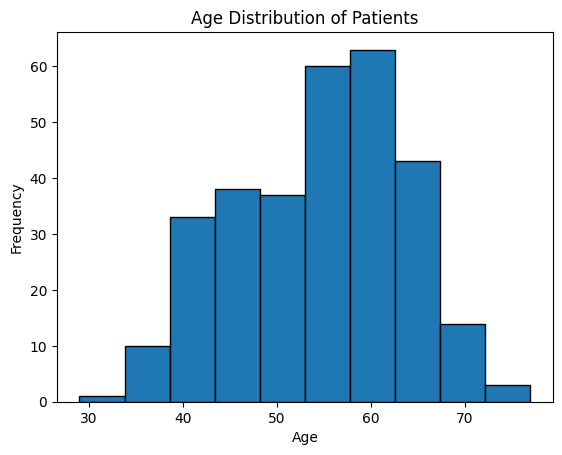

In [12]:
plt.hist(df['age'], bins=10, edgecolor='black')
plt.title('Age Distribution of Patients')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

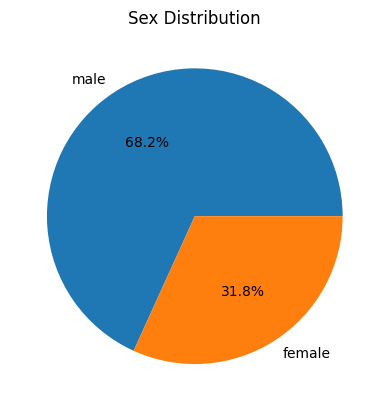

In [13]:
sex_count = df['sex'].value_counts()
plt.pie(sex_count, labels=sex_count.index, autopct='%1.1f%%')
plt.title('Sex Distribution')
plt.show()

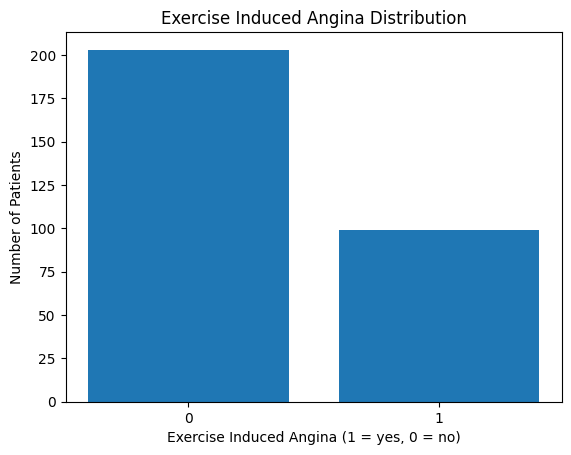

In [14]:
exang_count = df['exng'].value_counts()
plt.bar(exang_count.index, exang_count.values)
plt.title('Exercise Induced Angina Distribution')
plt.xlabel('Exercise Induced Angina (1 = yes, 0 = no)')
plt.ylabel('Number of Patients')
plt.xticks(exang_count.index)
plt.show()

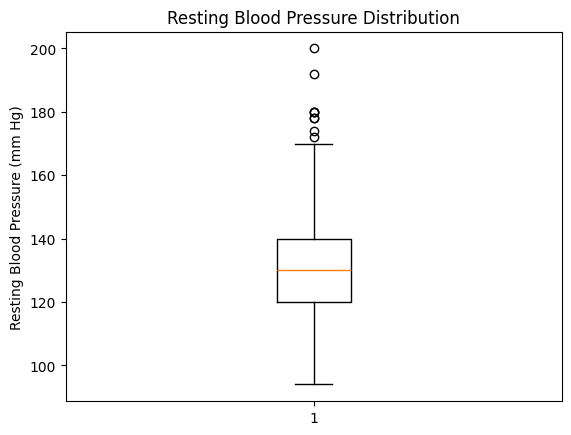

In [15]:
plt.boxplot(df['trtbps'])
plt.title('Resting Blood Pressure Distribution')
plt.ylabel('Resting Blood Pressure (mm Hg)')
plt.show()

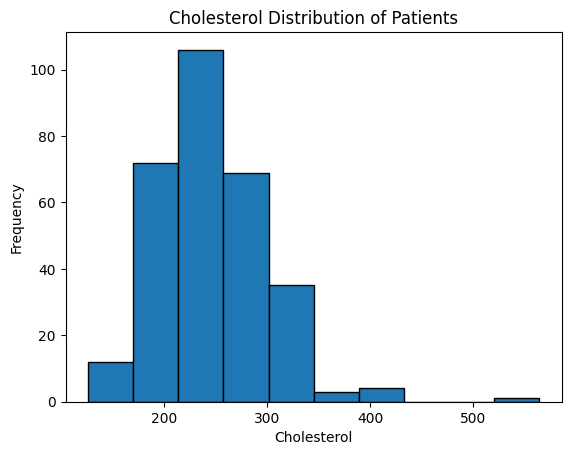

In [16]:
plt.hist(df['chol'], bins=10, edgecolor='black')
plt.title('Cholesterol Distribution of Patients')
plt.xlabel('Cholesterol')
plt.ylabel('Frequency')
plt.show()

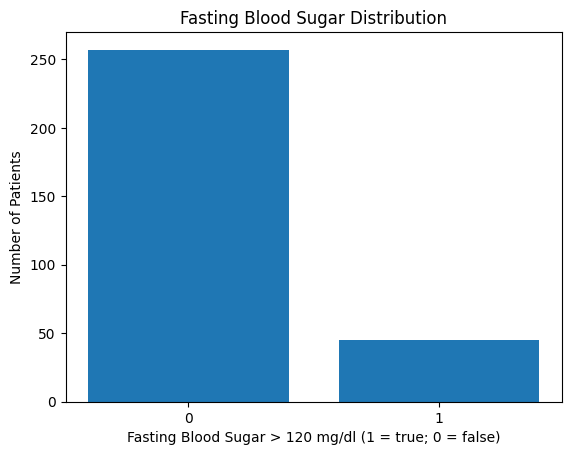

In [17]:
fbs_count = df['fbs'].value_counts()
plt.bar(fbs_count.index, fbs_count.values)
plt.title('Fasting Blood Sugar Distribution')
plt.xlabel('Fasting Blood Sugar > 120 mg/dl (1 = true; 0 = false)')
plt.ylabel('Number of Patients')
plt.xticks(fbs_count.index)
plt.show()

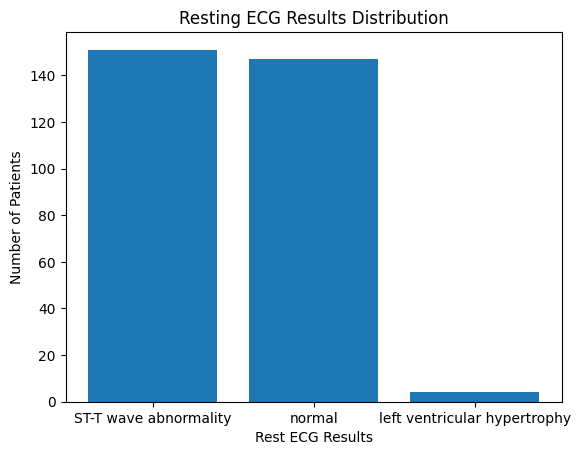

In [18]:
rest_ecg_count = df['restecg'].value_counts()
plt.bar(rest_ecg_count.index, rest_ecg_count.values)
plt.title('Resting ECG Results Distribution')
plt.xlabel('Rest ECG Results')
plt.ylabel('Number of Patients')
plt.xticks(rest_ecg_count.index)
plt.show()

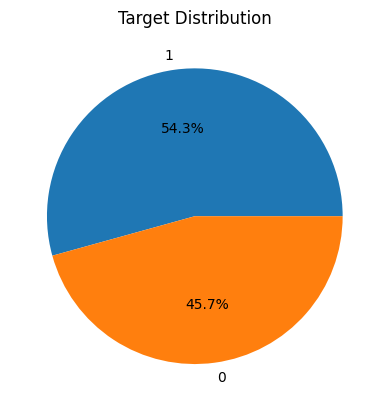

In [19]:
target_count = df['output'].value_counts()
plt.pie(target_count, labels=target_count.index, autopct='%1.1f%%')
plt.title('Target Distribution')
plt.show()

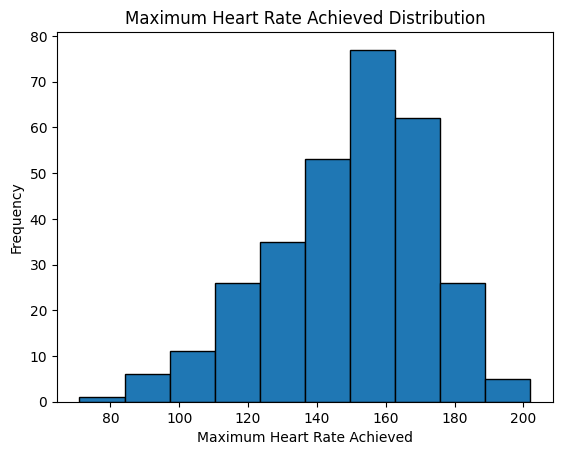

In [20]:
plt.hist(df['thalachh'], bins=10, edgecolor='black')
plt.title('Maximum Heart Rate Achieved Distribution')
plt.xlabel('Maximum Heart Rate Achieved')
plt.ylabel('Frequency')
plt.show()

## 3. Bivariate Analysis

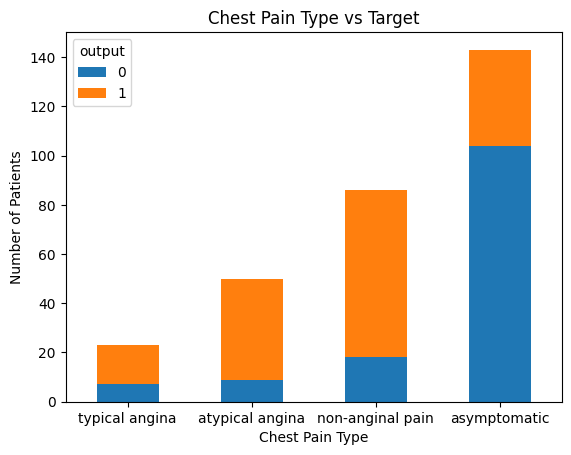

In [21]:
cp_target = df.groupby(['cp', 'output']).size().unstack().fillna(0)
cp_target.plot(kind='bar', stacked=True)
plt.title('Chest Pain Type vs Target')
plt.xlabel('Chest Pain Type')
plt.ylabel('Number of Patients')
plt.xticks(ticks=[0,1,2,3], labels=['typical angina', 'atypical angina', 'non-anginal pain', 'asymptomatic'], rotation=0)
plt.show()

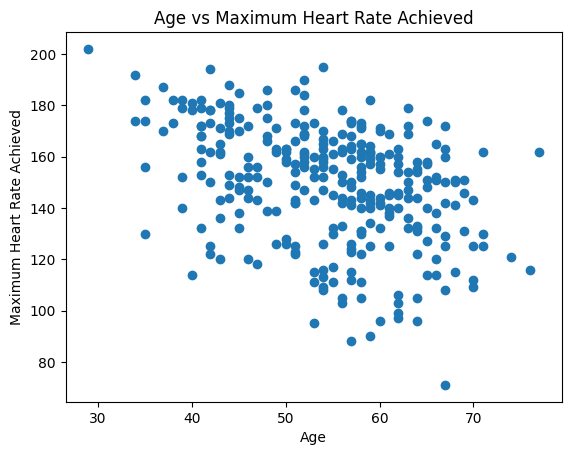

In [22]:
plt.scatter(df['age'], df['thalachh'])
plt.title('Age vs Maximum Heart Rate Achieved')
plt.xlabel('Age')
plt.ylabel('Maximum Heart Rate Achieved')
plt.show()

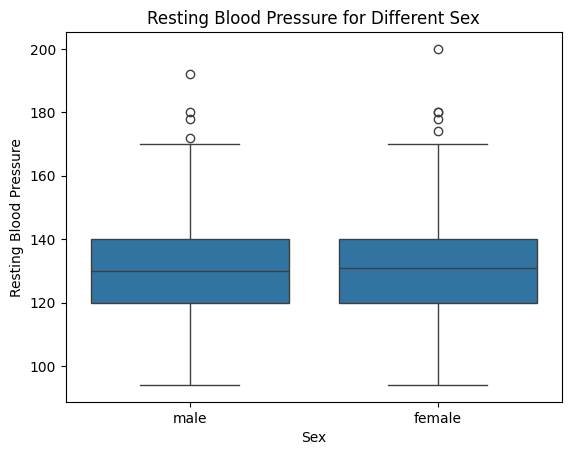

In [23]:
sns.boxplot(x='sex', y='trtbps', data=df)
plt.title('Resting Blood Pressure for Different Sex')
plt.xlabel('Sex')
plt.ylabel('Resting Blood Pressure')
plt.show()

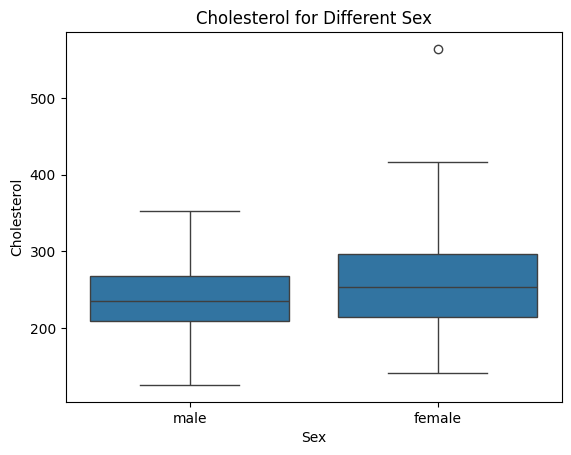

In [24]:
sns.boxplot(x='sex', y='chol', data=df)
plt.title('Cholesterol for Different Sex')
plt.xlabel('Sex')
plt.ylabel('Cholesterol')
plt.show()

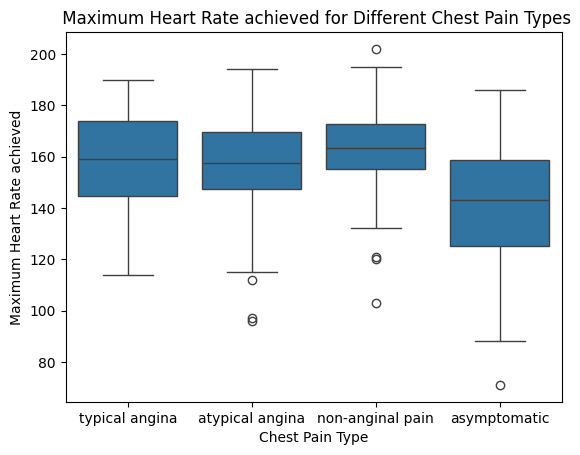

In [25]:
sns.boxplot(x='cp', y='thalachh', data=df)
plt.title(' Maximum Heart Rate achieved for Different Chest Pain Types')
plt.xlabel('Chest Pain Type')
plt.ylabel('Maximum Heart Rate achieved')
plt.xticks(ticks=[0,1,2,3], labels=['typical angina', 'atypical angina', 'non-anginal pain', 'asymptomatic'])
plt.show()


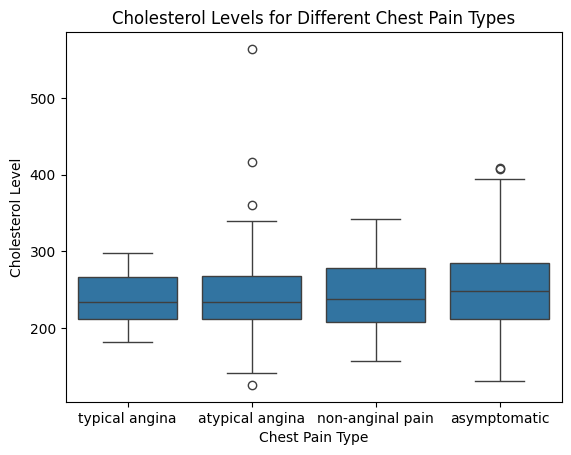

In [26]:
sns.boxplot(x='cp', y='chol', data=df)
plt.title('Cholesterol Levels for Different Chest Pain Types')
plt.xlabel('Chest Pain Type')
plt.ylabel('Cholesterol Level')
plt.xticks(ticks=[0,1,2,3], labels=['typical angina', 'atypical angina', 'non-anginal pain', 'asymptomatic'])
plt.show()


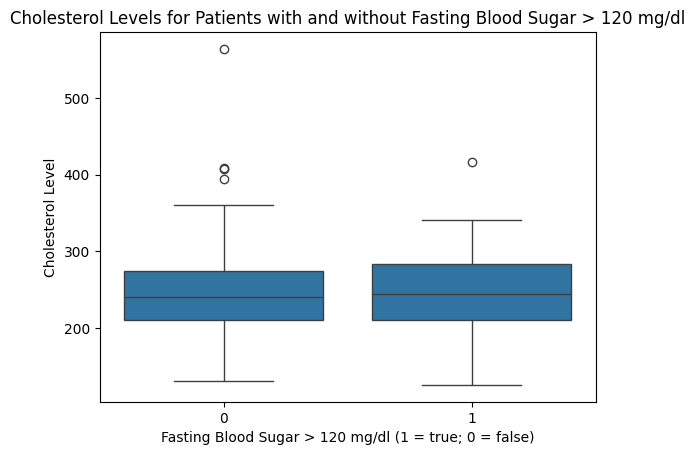

In [27]:
sns.boxplot(x='fbs', y='chol', data=df)
plt.title('Cholesterol Levels for Patients with and without Fasting Blood Sugar > 120 mg/dl')
plt.xlabel('Fasting Blood Sugar > 120 mg/dl (1 = true; 0 = false)')
plt.ylabel('Cholesterol Level')
plt.show()


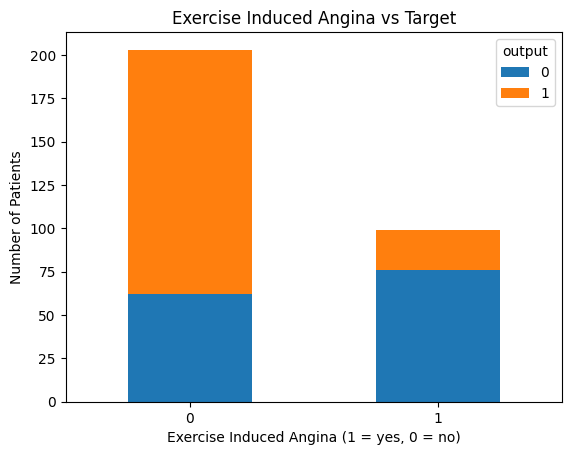

In [28]:
exang_target = df.groupby(['exng', 'output']).size().unstack().fillna(0)
exang_target.plot(kind='bar', stacked=True)
plt.title('Exercise Induced Angina vs Target')
plt.xlabel('Exercise Induced Angina (1 = yes, 0 = no)')
plt.ylabel('Number of Patients')
plt.xticks(rotation=0)
plt.show()

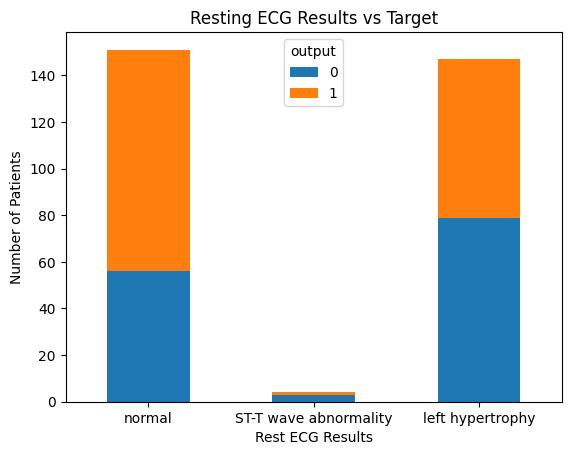

In [29]:
restecg_target = df.groupby(['restecg', 'output']).size().unstack().fillna(0)
restecg_target.plot(kind='bar', stacked=True)
plt.title('Resting ECG Results vs Target')
plt.xlabel('Rest ECG Results')
plt.ylabel('Number of Patients')
plt.xticks(ticks=[0,1,2], labels=['normal', 'ST-T wave abnormality', 'left hypertrophy'], rotation=0)
plt.show()

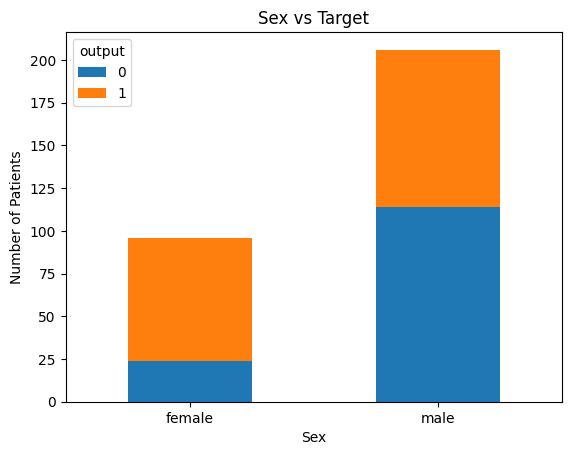

In [30]:
sex_target = df.groupby(['sex', 'output']).size().unstack().fillna(0)
sex_target.plot(kind='bar', stacked=True)
plt.title('Sex vs Target')
plt.xlabel('Sex')
plt.ylabel('Number of Patients')
plt.xticks(rotation=0)
plt.show()

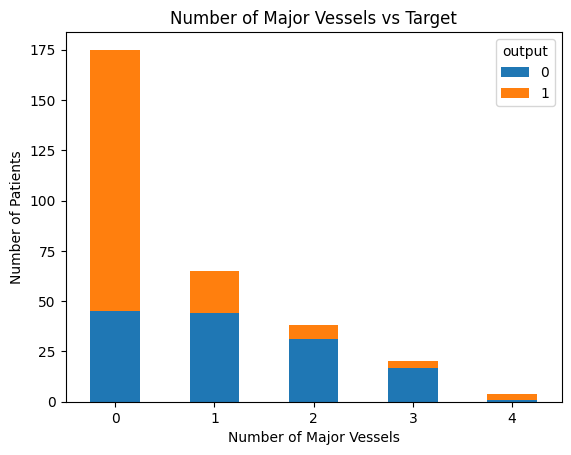

In [31]:
ca_target = df.groupby(['caa', 'output']).size().unstack().fillna(0)
ca_target.plot(kind='bar', stacked=True)
plt.title('Number of Major Vessels vs Target')
plt.xlabel('Number of Major Vessels')
plt.ylabel('Number of Patients')
plt.xticks(rotation=0)
plt.show()

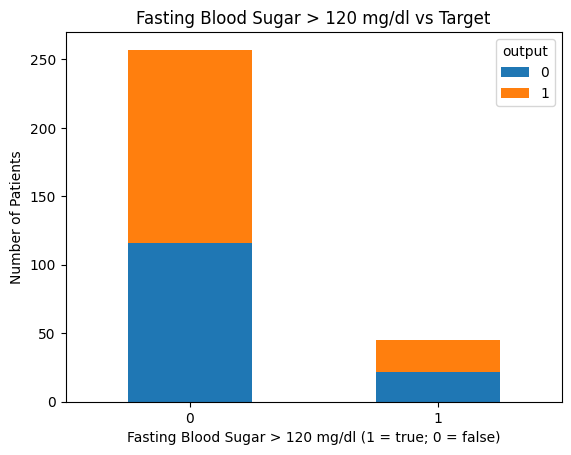

In [32]:
fbs_target = df.groupby(['fbs', 'output']).size().unstack().fillna(0)
fbs_target.plot(kind='bar', stacked=True)
plt.title('Fasting Blood Sugar > 120 mg/dl vs Target')
plt.xlabel('Fasting Blood Sugar > 120 mg/dl (1 = true; 0 = false)')
plt.ylabel('Number of Patients')
plt.xticks(rotation=0)
plt.show()

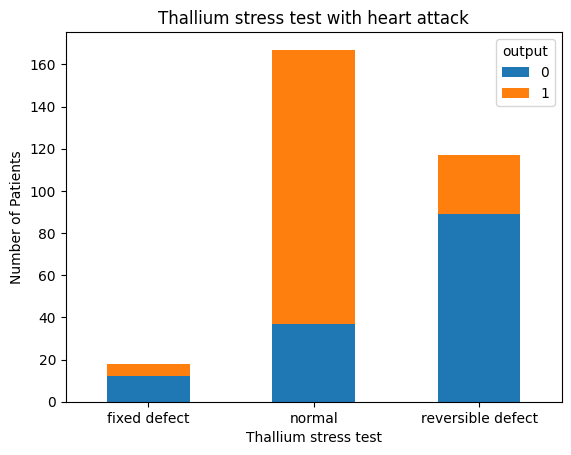

In [33]:
fbs_target = df.groupby(['thall', 'output']).size().unstack().fillna(0)
fbs_target.plot(kind='bar', stacked=True)
plt.title('Thallium stress test with heart attack')
plt.xlabel('Thallium stress test')
plt.ylabel('Number of Patients')
plt.xticks(rotation=0)
plt.show()

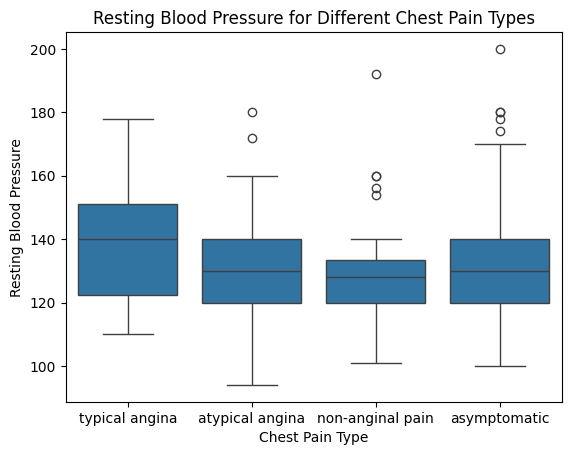

In [34]:
sns.boxplot(x='cp', y='trtbps', data=df)
plt.title('Resting Blood Pressure for Different Chest Pain Types')
plt.xlabel('Chest Pain Type')
plt.ylabel('Resting Blood Pressure')
plt.xticks(ticks=[0,1,2,3], labels=['typical angina', 'atypical angina', 'non-anginal pain', 'asymptomatic'])
plt.show()


##  4. Multivariate Analysis

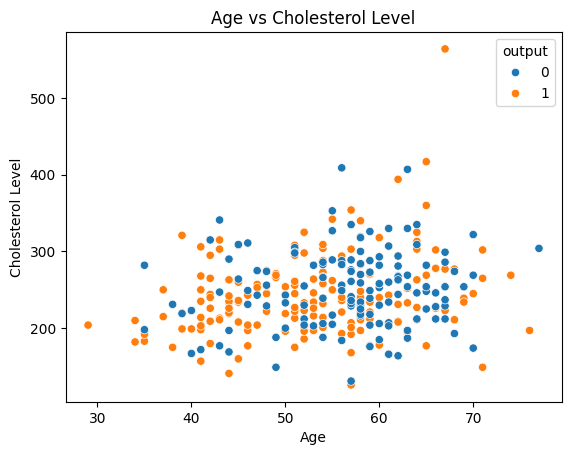

In [35]:
sns.scatterplot(x='age', y='chol', hue='output', data=df)
plt.title('Age vs Cholesterol Level')
plt.xlabel('Age')
plt.ylabel('Cholesterol Level')
plt.show()

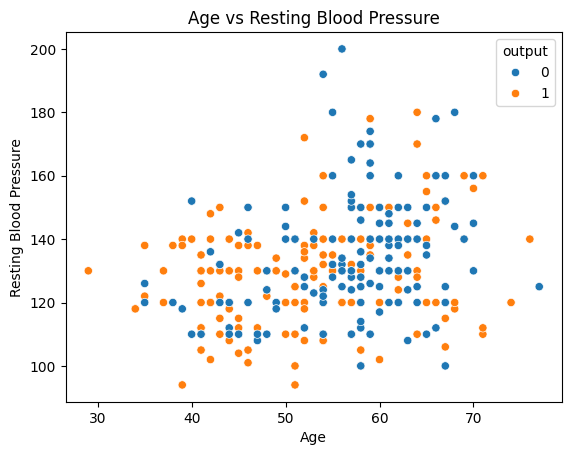

In [36]:
sns.scatterplot(x='age', y='trtbps', hue='output', data=df)
plt.title('Age vs Resting Blood Pressure')
plt.xlabel('Age')
plt.ylabel('Resting Blood Pressure')
plt.show()

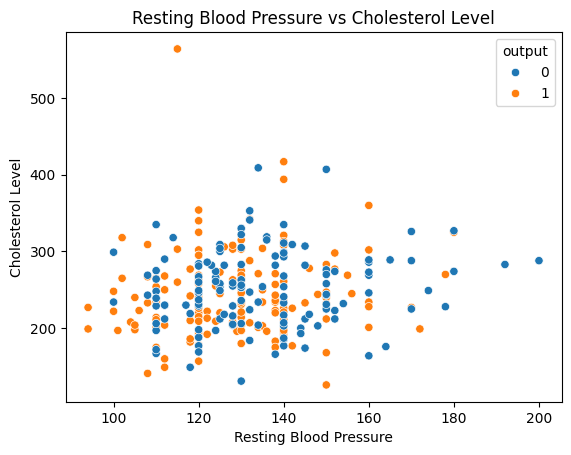

In [37]:
sns.scatterplot(x='trtbps', y='chol', hue='output', data=df)
plt.title('Resting Blood Pressure vs Cholesterol Level')
plt.xlabel('Resting Blood Pressure')
plt.ylabel('Cholesterol Level')
plt.show()

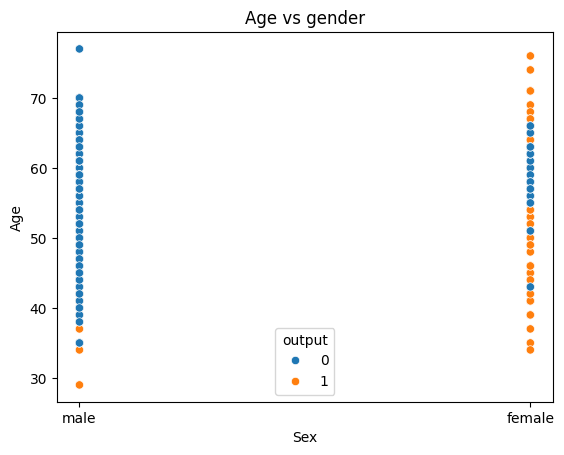

In [38]:
sns.scatterplot(x='sex', y='age', hue='output', data=df)
plt.title('Age vs gender')
plt.xlabel('Sex')
plt.ylabel('Age')
plt.show()

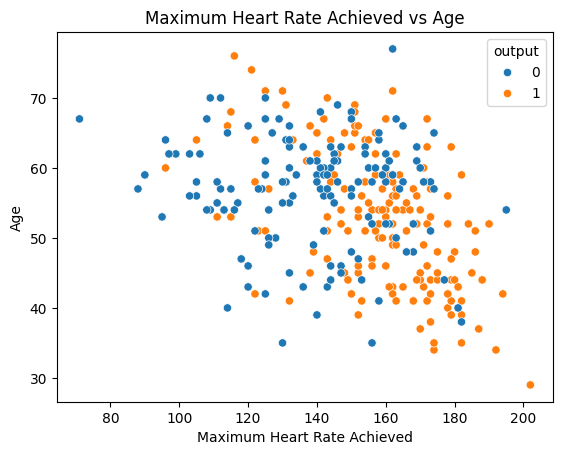

In [39]:
sns.scatterplot(x='thalachh', y='age', hue='output', data=df)
plt.title('Maximum Heart Rate Achieved vs Age')
plt.xlabel('Maximum Heart Rate Achieved')
plt.ylabel('Age')
plt.show()

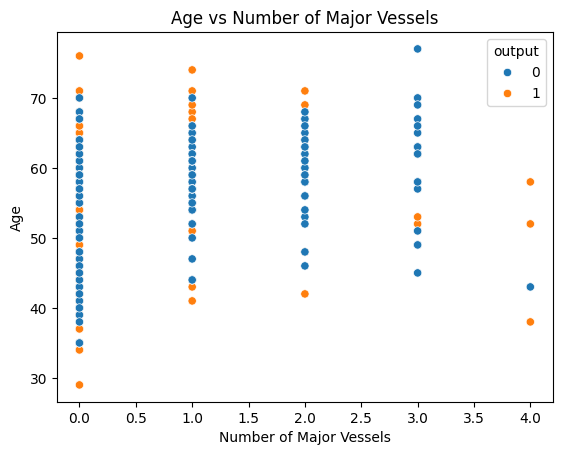

In [40]:
sns.scatterplot(x='caa', y='age', hue='output', data=df)
plt.title('Age vs Number of Major Vessels')
plt.xlabel('Number of Major Vessels')
plt.ylabel('Age')
plt.show()

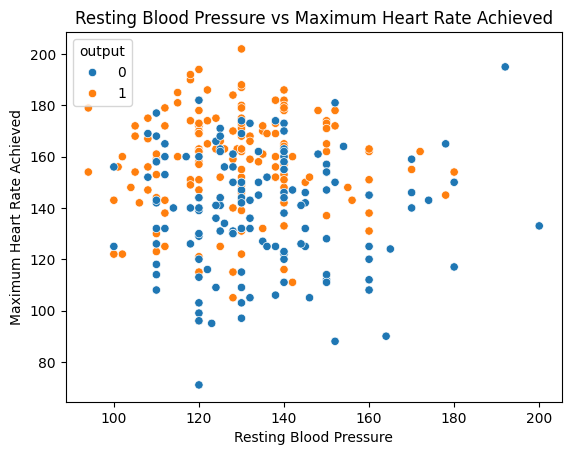

In [41]:
sns.scatterplot(x='trtbps', y='thalachh', hue='output', data=df)
plt.title('Resting Blood Pressure vs Maximum Heart Rate Achieved')
plt.xlabel('Resting Blood Pressure')
plt.ylabel('Maximum Heart Rate Achieved')
plt.show()

# 3 | CORRELATION 

##  1.Dealing with categorical and numerical column
    


In [42]:
data = df.copy()

In [43]:
categorical_columns = ['sex','cp','restecg','slp','thall']
numerical_columns = ['age','trtbps','chol','fbs','thalachh','exng','oldpeak','caa','output']
dummy_variables = pd.get_dummies(data, columns=categorical_columns, drop_first=False)

In [44]:
#Preprocessing and Scaling the data

scaler = StandardScaler()

# Scale the numerical columns
scaled_numerical = scaler.fit_transform(data[numerical_columns])

# Convert the scaled numerical columns
scaled_numerical_df = pd.DataFrame(scaled_numerical, columns=numerical_columns)

##   2.Dealing with categorical variables


In [45]:

#Create Dummy Variables

# Drop the original numerical columns
dummy_variables = dummy_variables.drop(numerical_columns, axis=1)

# Concatenate the dummy variables and scaled numerical columns
processed_df = pd.concat([dummy_variables, scaled_numerical_df], axis=1)

##  3.Correlation

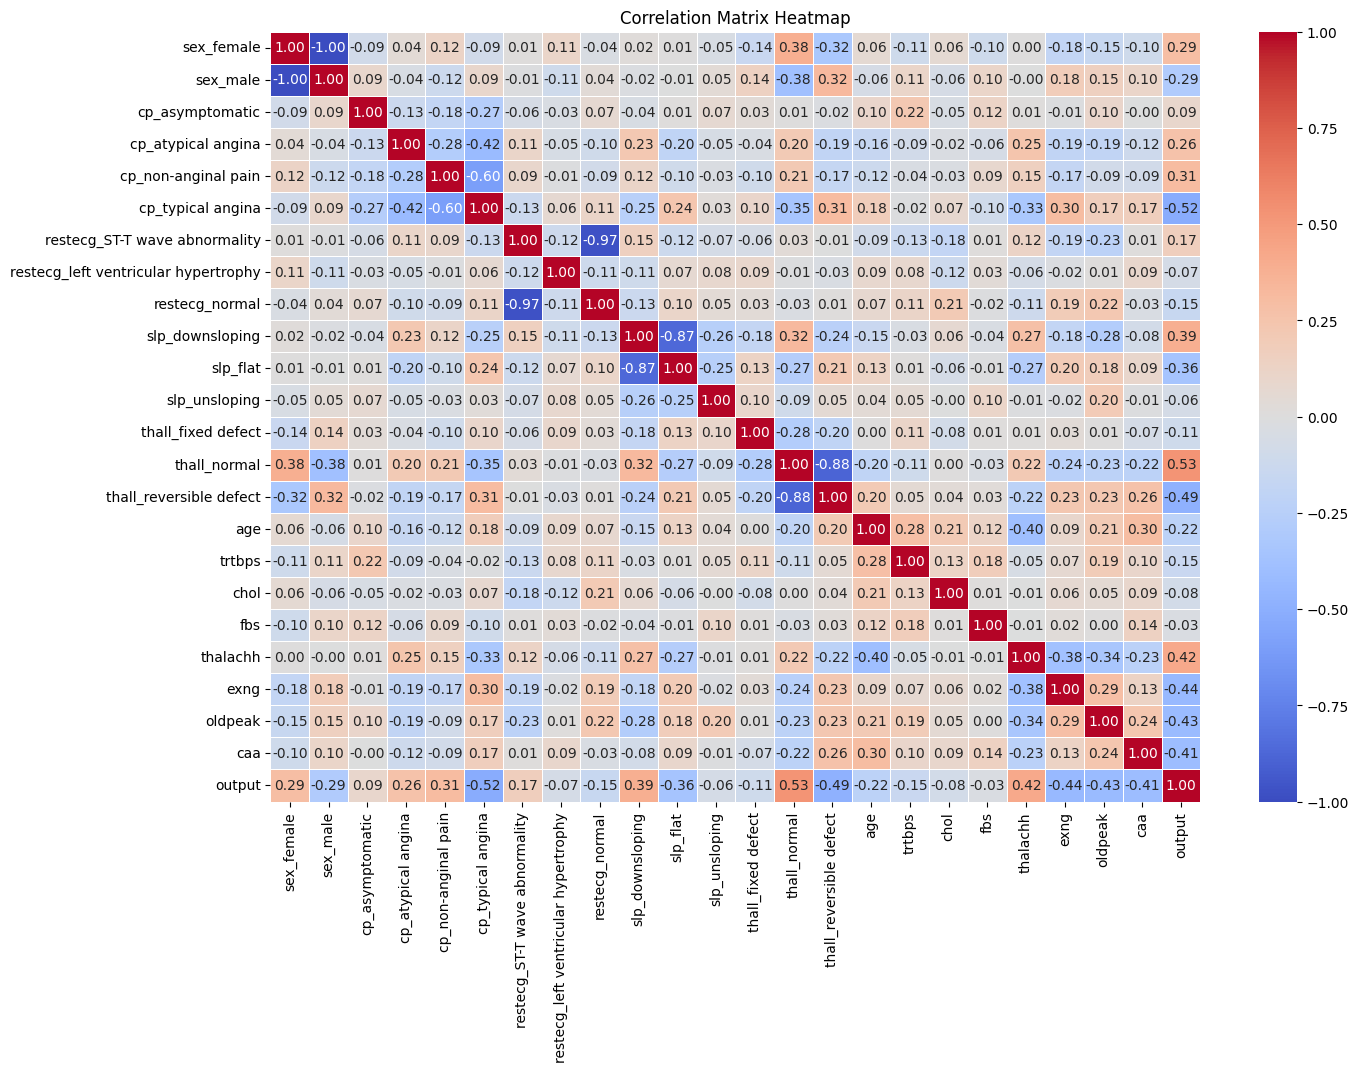

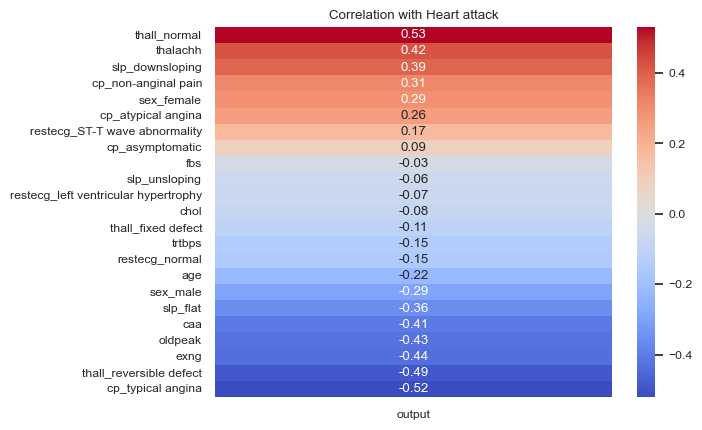

In [46]:
# Corelation Matrix with dummy variables

correlation_matrix = processed_df.corr()

#Graph I.
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt='.2f')
plt.title("Correlation Matrix Heatmap")
plt.show()

corr = processed_df.corr()
target_corr = corr['output'].drop('output')

# Sort correlation values in descending order
target_corr_sorted = target_corr.sort_values(ascending=False)

#Graph II
# Create a heatmap of the correlations with the target column
sns.set(font_scale=0.8)
sns.set_style("white")
sns.set_palette("PuBuGn_d")
sns.heatmap(target_corr_sorted.to_frame(), cmap="coolwarm", annot=True, fmt='.2f')
plt.title('Correlation with Heart attack')
plt.show()

## 4. Intepret the result

**Our dataset comprises of various factors related to heart health and overall health indicators. In this analysis, we examine the relationship of these factors with the likelihood of heart disease, characterized by >50% diameter narrowing.**



## <b>1 <span style='color:#007000'>|</span> Positive Correlations</b> 

<div style="border-radius:10px;border:#007000 solid;padding: 15px;background-color:#ffffff00;font-size:100%;text-align:left">

<strong>1. Normal Thallium Stress Test Results (thall_normal, 0.526866)</strong>



<strong>2. Maximum Heart Rate Achieved (thalachh, 0.421741)</strong>


   

<strong>3. Downsloping Peak Exercise ST Segment (slp_downsloping, 0.394066)</strong>


    

<strong>4. Non-anginal Chest Pain (cp_non-anginal pain, 0.316742)</strong>



<strong>5. Female (sex_female, 0.280937)</strong>


    
   </div>

## <b>2 <span style='color:#D2222D'>|</span> Negative Correlations</b> 

<div style="border-radius:10px;border:#D2222D solid;padding: 15px;background-color:#ffffff00;font-size:100%;text-align:left">

<strong>1. Typical Angina (cp_typical angina, -0.516015)</strong>


<strong>2. Reversible Defect in Thallium Stress Test (thall_reversible defect, -0.486112)</strong>



<strong>3. Exercise-Induced Angina (exng, -0.436757)</strong>


<strong>4. ST Depression Induced by Exercise Relative to Rest (oldpeak, -0.430696)</strong>



<strong>5. Number of Major Vessels Colored by Fluoroscopy (caa, -0.391724)</strong>

    
 </div>   



# 3 | PREDICTIVE ANALYSIS
<br>

### INTRODUCTION 

<br>

In this process, we will demonstrate how to build a heart disease prediction model using several machine learning algorithms. We'll explore and compare different machine learning models including Logistic Regression, Decision Trees, Random Forests , K-Nearest Neighbors (KNN)

We will use a dataset containing patients' information such as `age`, `sex`, `chest pain type`, `resting blood pressure`, `cholesterol levels`, `fasting blood sugar`, `rest ECG results`, `maximum heart rate achieved`, `exercise induced angina`, `oldpeak`, `the slope of the peak exercise ST segment`, `number of major vessels`, and `thallium stress test results`.

**The goal is to predict the presence of heart disease (angiographic disease status) in the patient based on these features.**

#### <b><span style='color:#16C2D5'>|</span> The process involves several steps:</b> 


1. **Data Loading:** We load the dataset into the notebook using pandas.

2. **Data Preprocessing:** In this step, we convert categorical variables into dummy/indicator variables, handle missing values if any, and scale numerical features to a similar range.

3. **Splitting the Data:** We split the dataset into a training set and a test set.

4. **Model Training:** We train different models on the training data.

5. **Model Evaluation:** Each model is evaluated on the test data. We calculate the accuracy of each model on the training and test data. We also generate confusion matrices for each model to better understand their performance.

6. **Model Comparison:** We compare the performance of the different models visually using plots.

<br>

### <b><span style='color:#16C2D5'>|</span> Data Preprocessing</b> 

In [47]:
categorical_columns = ['sex','cp','restecg','slp','thall']
numerical_columns = ['age','trtbps','chol','fbs','thalachh','exng','oldpeak','caa']

In [48]:
# Split data
X = data.drop('output', axis=1)
y = data['output']

### <b><span style='color:#16C2D5'>|</span> Splitting the Data</b> 

In [49]:
# Split data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# define preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_columns),
        ('cat', OneHotEncoder(), categorical_columns)])

# fit and transform training data
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

In [50]:
def evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    train_preds = model.predict(X_train)
    test_preds = model.predict(X_test)
    train_acc = accuracy_score(y_train, train_preds)
    test_acc = accuracy_score(y_test, test_preds)
    return train_acc, test_acc, test_preds

In [51]:
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j], horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

### <b><span style='color:#16C2D5'>|</span> Model Traning</b> 

In [52]:
models = [
    LogisticRegression(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    KNeighborsClassifier()
]

In [53]:
model_names = ["Logistic Regression", "Decision Trees", "Random Forest", "KNN"]

train_results = []
test_results = []

### <b><span style='color:#16C2D5'>|</span> Model Evaluation</b> 

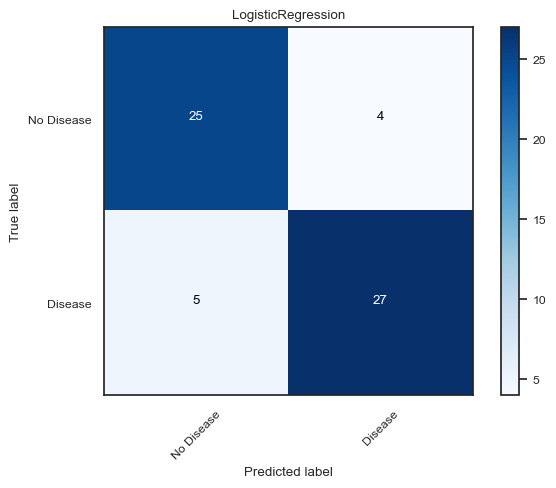

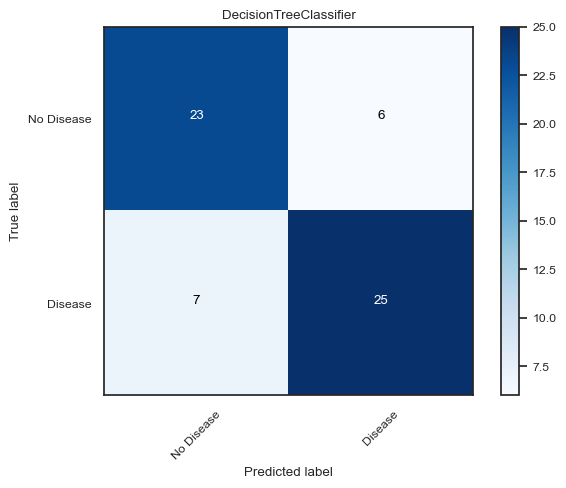

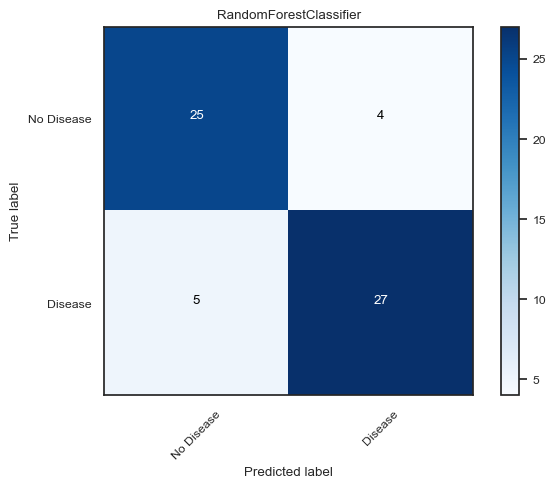

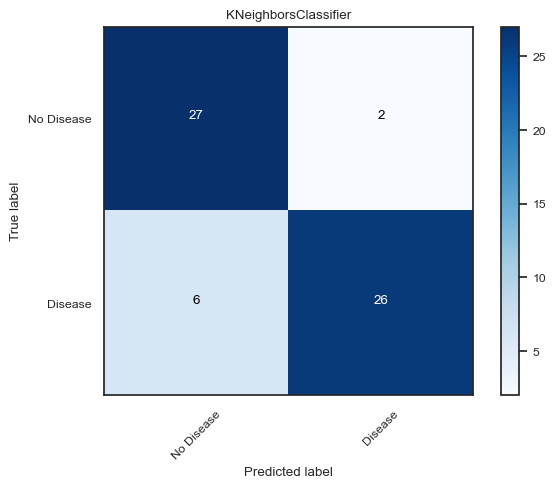

In [54]:
for model in models:
    train_acc, test_acc, y_pred = evaluate_model(model, X_train, y_train, X_test, y_test)
    train_results.append(train_acc)
    test_results.append(test_acc)
    cm = confusion_matrix(y_test, y_pred)
   
    plot_confusion_matrix(cm, classes=['No Disease', 'Disease'], title=model.__class__.__name__)
    plt.show()

### <b><span style='color:#16C2D5'>|</span> Model Comparision</b> 

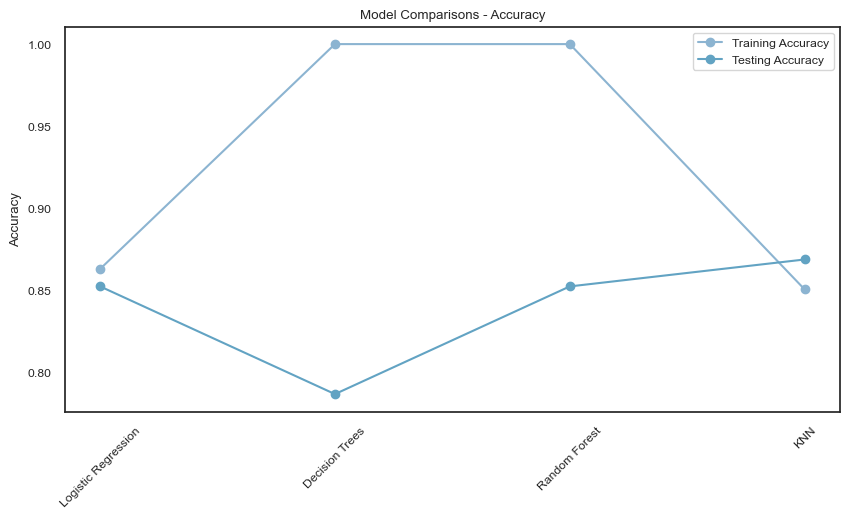

In [55]:
# plot model performance
plt.figure(figsize=(10,5))
plt.plot(model_names, train_results, 'o-', label="Training Accuracy")
plt.plot(model_names, test_results, 'o-', label="Testing Accuracy")
plt.ylabel("Accuracy")
plt.xticks(rotation=45)
plt.legend()
plt.title("Model Comparisons - Accuracy")
plt.show()

In [56]:
accuracy_data = {
    'Model': model_names,
    'Training Accuracy': train_results,
    'Testing Accuracy': test_results
}

# Create a DataFrame from the accuracy data
accuracy_df = pd.DataFrame(accuracy_data)

# Display the DataFrame
print(accuracy_df)

                 Model  Training Accuracy  Testing Accuracy
0  Logistic Regression           0.863071          0.852459
1       Decision Trees           1.000000          0.786885
2        Random Forest           1.000000          0.852459
3                  KNN           0.850622          0.868852
